In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
df_em = pd.read_csv("../../data/raw/owid_emissions.csv") #Emissions dataframe
df_em

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [ ]:
#Read in world dataframe which contains geometry of countries to plot with geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')).sort_values(by=["name"]).reset_index()
world

,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,103,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,125,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,82,43053054.0,Africa,Algeria,DZA,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,74,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,159,4490.0,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
...,...,...,...,...,...,...,...
172,2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
173,157,29161922.0,Asia,Yemen,YEM,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
174,70,17861030.0,Africa,Zambia,ZMB,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
175,48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [ ]:
#Drop data before 1960
emissions = df_em.drop(df_em[df_em["year"] < 1960].index)
emissions

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
110,Afghanistan,1960,AFG,8622473.0,1.303325e+10,0.018,0.002,0.414,0.029,7.623,...,NaN,0.0,0.0,0.275,0.009,NaN,NaN,NaN,NaN,NaN
111,Afghanistan,1961,AFG,8790140.0,1.314629e+10,0.022,0.002,0.491,0.077,18.583,...,NaN,0.0,0.0,0.261,0.009,NaN,NaN,NaN,NaN,NaN
112,Afghanistan,1962,AFG,8969055.0,1.336763e+10,0.029,0.003,0.689,0.198,40.301,...,NaN,0.0,0.0,0.242,0.010,NaN,NaN,NaN,NaN,NaN
113,Afghanistan,1963,AFG,9157463.0,1.363030e+10,0.051,0.006,0.707,0.018,2.635,...,NaN,0.0,0.0,0.250,0.010,NaN,NaN,NaN,NaN,NaN
114,Afghanistan,1964,AFG,9355510.0,1.387050e+10,0.062,0.007,0.839,0.132,18.651,...,NaN,0.0,0.0,0.205,0.012,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [ ]:
#Replace some country names from emissions dataframe to match ones in world df
emissions.replace({"United States":"United States of America",
                  "Bosnia and Herzegovina": "Bosnia and Herz.",
                  'Democratic Republic of Congo':'Dem. Rep. Congo',
                  "Equatorial Guinea":"Eq. Guinea",
                  'South Sudan':'S. Sudan',
                  'Central African Republic':'Central African Rep.',
                  "Cote d'Ivoire":"Côte d'Ivoire",
                  'Western Sahara':'W. Sahara',
                  'Eswatini':'eSwatini',
                  "Somalia":'Somaliland'}, inplace=True)

In [ ]:
#Pivot so each country is a row and each column is the year
pivot = emissions.pivot(index="country",columns=["year"],values=["co2"])

In [ ]:
pivot = pivot[pivot.index.isin(world["name"].unique().tolist())]
pivot

co2                                                           \
year          1960   1961   1962   1963   1964   1965   1966   1967    1968   
country                                                                       
Afghanistan  0.414  0.491  0.689  0.707  0.839  1.007  1.091  1.282   1.223   
Albania      2.022  2.279  2.462  2.081  2.015  2.172  2.550  2.677   3.069   
Algeria      6.151  6.056  5.661  5.419  5.643  6.589  8.421  8.432   9.050   
Angola       0.549  0.454  1.179  1.150  1.223  1.186  1.552  0.992   1.670   
Antarctica     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
...            ...    ...    ...    ...    ...    ...    ...    ...     ...   
W. Sahara      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
Yemen        3.631  2.664  3.884  2.917  3.631  3.928  3.462  3.052  11.637   
Zambia       4.355  3.709  3.583  3.444  3.275  3.912  3.498  4.788   4.568   
Zimbabwe     5.943  5.061  4.889  4.700  4.469  5.209  6.041  5.294   6.378   
eSwatini     0.033  0.004    NaN    NaN  0.011  0.081  0.202  0.227   0.278   

                     ...                                               \
year           1969  ...     2012     2013     2014     2015     2016   
country              ...                                                
Afghanistan   0.941  ...   10.035    9.251    9.170    9.791    9.068   
Albania       3.241  ...    4.850    5.287    6.000    4.712    4.632   
Algeria      11.263  ...  135.674  140.786  151.283  160.087  158.748   
Angola        2.783  ...   25.540   24.719   25.148   25.531   27.210   
Antarctica      NaN  ...      NaN      NaN      NaN      NaN      NaN   
...             ...  ...      ...      ...      ...      ...      ...   
W. Sahara       NaN  ...      NaN      NaN      NaN      NaN      NaN   
Yemen         4.675  ...   20.356   27.160   26.477   14.084   10.902   
Zambia        4.271  ...    4.166    4.416    4.877    5.065    5.857   
Zimbabwe      6.744  ...   11.254   11.671   11.946   12.255   10.533   
eSwatini      0.304  ...    1.169    1.400    0.769    0.868    1.055   

                                                          
year            2017     2018     2019     2020     2021  
country                                                   
Afghanistan    9.868   10.818   11.082   11.682   11.874  
Albania        5.564    4.984    4.947    4.729    4.619  
Algeria      166.411  173.912  179.505  172.504  176.269  
Angola        24.304   22.779   21.818   20.276   21.363  
Antarctica       NaN      NaN      NaN      NaN      NaN  
...              ...      ...      ...      ...      ...  
W. Sahara        NaN      NaN      NaN      NaN      NaN  
Yemen         10.589   10.474   12.684   12.140   12.477  
Zambia         6.843    7.412    7.747    7.281    7.676  
Zimbabwe       9.596   11.795   11.115   10.608   11.296  
eSwatini       0.986    1.033    1.121    1.060    1.087  

[170 rows x 62 columns]

In [ ]:
world.index = world["name"]
world.drop(["index","iso_a3"],axis=1,inplace=True)
for i in range(1960,2022):
    curr = f"{i}_co2"
    world[curr] = pivot["co2",i]
world


,pop_est,continent,name,gdp_md_est,geometry,1960_co2,1961_co2,1962_co2,1963_co2,1964_co2,...,2012_co2,2013_co2,2014_co2,2015_co2,2016_co2,2017_co2,2018_co2,2019_co2,2020_co2,2021_co2
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,38041754.0,Asia,Afghanistan,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",0.414,0.491,0.689,0.707,0.839,...,10.035,9.251,9.170,9.791,9.068,9.868,10.818,11.082,11.682,11.874
Albania,2854191.0,Europe,Albania,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",2.022,2.279,2.462,2.081,2.015,...,4.850,5.287,6.000,4.712,4.632,5.564,4.984,4.947,4.729,4.619
Algeria,43053054.0,Africa,Algeria,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",6.151,6.056,5.661,5.419,5.643,...,135.674,140.786,151.283,160.087,158.748,166.411,173.912,179.505,172.504,176.269
Angola,31825295.0,Africa,Angola,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",0.549,0.454,1.179,1.150,1.223,...,25.540,24.719,25.148,25.531,27.210,24.304,22.779,21.818,20.276,21.363
Antarctica,4490.0,Antarctica,Antarctica,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W. Sahara,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,29161922.0,Asia,Yemen,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",3.631,2.664,3.884,2.917,3.631,...,20.356,27.160,26.477,14.084,10.902,10.589,10.474,12.684,12.140,12.477
Zambia,17861030.0,Africa,Zambia,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",4.355,3.709,3.583,3.444,3.275,...,4.166,4.416,4.877,5.065,5.857,6.843,7.412,7.747,7.281,7.676


<AxesSubplot:>

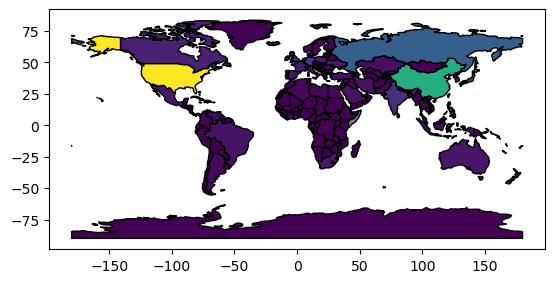

In [ ]:
missing_kwds = dict(color='grey', label='No Data')
world.plot(column="1995_co2",missing_kwds=missing_kwds,edgecolor='k')

In [ ]:
temp_df = pd.read_csv("../../data/raw/GlobalLandTemperaturesByCountry.csv")
temp_df["dt"] = (temp_df["dt"].apply(pd.to_datetime)).dt.date #Converts to datetime (Takes a while)
temp_df["year"] = [x.year for x in temp_df["dt"]] #Just shows the year
temp_df = temp_df.groupby([temp_df["year"],temp_df["Country"]])["AverageTemperature"].mean(numeric_only=True).reset_index()#Convertes monthly average temp into annaully
               
pivoted_df = (temp_df.sort_values(by=["Country","year"])
        .loc[lambda x: x.year > 1959] #Drops rows from before 1960
        .replace({"United States":"United States of America", #Changes a few country names for plotting with geopandas
                     "Congo (Democratic Republic Of The)" : "Dem. Rep. Congo",
                     "Central African Republic":"Central African Rep.",
                     "Côte D'Ivoire":"Côte d'Ivoire",
                     "Czech Republic":"Czechia"}))


In [ ]:
list2 = pivoted_df["Country"].tolist()
pivoted_df = pivoted_df[pivoted_df["Country"].isin(world["name"].unique().tolist())] #Gets rid of any country which is not in world data (basically small island nations)
pivoted_df = pivoted_df.pivot(index="Country",columns=["year"],values=["AverageTemperature"]) #pivots so each country is a row and the temperature at each year is the columns
pivoted_df

AverageTemperature                                              \
year                      1960       1961       1962       1963       1964   
Country                                                                      
Afghanistan          13.985417  14.064917  13.768667  15.033417  13.084917   
Albania              13.335083  13.316750  13.068750  13.085833  12.515333   
Algeria              23.504083  23.390333  23.182417  23.317833  23.147500   
Angola               21.927083  21.938750  21.848667  21.837750  21.686417   
Antarctica                 NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
Venezuela            25.401167  25.387250  25.425333  25.417083  25.364417   
Vietnam              24.144083  24.092667  23.702333  23.757583  23.953667   
Yemen                26.319083  26.331167  26.197333  26.268667  26.099083   
Zambia               21.400083  21.541167  21.266667  21.014583  21.129500   
Zimbabwe             21.178583  21.408500  21.432583  20.756500  21.080583   

                                                                    ...  \
year              1965       1966       1967       1968       1969  ...   
Country                                                             ...   
Afghanistan  14.101833  14.343000  13.663250  13.762333  13.805083  ...   
Albania      12.378417  13.204583  12.621750  12.869583  12.802917  ...   
Algeria      22.973750  23.301333  22.861667  23.185917  23.458250  ...   
Angola       21.819917  22.103250  21.776417  21.748167  22.190500  ...   
Antarctica         NaN        NaN        NaN        NaN        NaN  ...   
...                ...        ...        ...        ...        ...  ...   
Venezuela    25.291083  25.542000  25.058917  25.084417  25.684750  ...   
Vietnam      24.099167  24.521333  23.638833  23.903417  24.200667  ...   
Yemen        25.967667  26.483833  26.268250  26.104833  26.690500  ...   
Zambia       21.042667  21.667000  21.249167  21.247333  21.543417  ...   
Zimbabwe     20.992333  21.414500  21.145333  21.363167  21.345333  ...   

                                                                               \
year              2004       2005       2006       2007       2008       2009   
Country                                                                         
Afghanistan  15.770917  14.980000  15.595583  15.106167  15.216500  15.257750   
Albania      13.258167  12.747083  12.976917  13.890500  13.955167  13.844250   
Algeria      23.916000  24.222583  24.200833  24.065333  23.950250  24.154333   
Angola       22.572833  22.966083  21.947083  22.427083  22.287333  22.316500   
Antarctica         NaN        NaN        NaN        NaN        NaN        NaN   
...                ...        ...        ...        ...        ...        ...   
Venezuela    25.817833  26.019417  25.849917  25.854083  25.648250  26.084917   
Vietnam      24.056917  24.298000  24.523083  24.302167  23.784000  24.465583   
Yemen        27.334083  27.294667  27.175000  27.310750  26.807500  27.342417   
Zambia       21.768083  22.813500  21.784250  21.838500  21.535833  21.670250   
Zimbabwe     21.330917  22.509917  21.618750  21.604250  21.545583  21.377250   

                                                         
year              2010       2011       2012       2013  
Country                                                  
Afghanistan  15.828667  15.518000  14.481583  16.533625  
Albania      13.775417  13.443250  13.768250  14.993875  
Algeria      25.215667  24.144167  23.954833  25.121500  
Angola       22.681500  22.029667  22.123333  22.507875  
Antarctica         NaN        NaN        NaN        NaN  
...                ...        ...        ...        ...  
Venezuela    26.150250  25.677333  25.688583  25.912875  
Vietnam      24.833333  23.692583  24.704333  25.232125  
Yemen        27.302750  27.288250  27.445000  28.129750  
Zambia       22.267500  21.771583  21

In [ ]:
list1 = world.index.tolist()
def non_match_elements(list_a, list_b):
    non_match = []
    for i in list_a:
        if i not in list_b:
            non_match.append(i)
    return non_match
#non_match_elements(list1,list2)
world = pd.concat((world,pivoted_df),axis=1)

<AxesSubplot:>

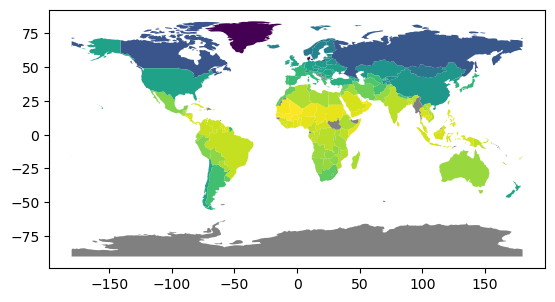

In [ ]:
missing_kwds = dict(color='grey', label='No Data')
world.plot(column=('AverageTemperature', 2004),missing_kwds=missing_kwds)

In [ ]:
world

,pop_est,continent,name,gdp_md_est,geometry,1960_co2,1961_co2,1962_co2,1963_co2,1964_co2,...,"(AverageTemperature, 2004)","(AverageTemperature, 2005)","(AverageTemperature, 2006)","(AverageTemperature, 2007)","(AverageTemperature, 2008)","(AverageTemperature, 2009)","(AverageTemperature, 2010)","(AverageTemperature, 2011)","(AverageTemperature, 2012)","(AverageTemperature, 2013)"
Afghanistan,38041754.0,Asia,Afghanistan,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",0.414,0.491,0.689,0.707,0.839,...,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.481583,16.533625
Albania,2854191.0,Europe,Albania,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",2.022,2.279,2.462,2.081,2.015,...,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.768250,14.993875
Algeria,43053054.0,Africa,Algeria,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",6.151,6.056,5.661,5.419,5.643,...,23.916000,24.222583,24.200833,24.065333,23.950250,24.154333,25.215667,24.144167,23.954833,25.121500
Angola,31825295.0,Africa,Angola,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",0.549,0.454,1.179,1.150,1.223,...,22.572833,22.966083,21.947083,22.427083,22.287333,22.316500,22.681500,22.029667,22.123333,22.507875
Antarctica,4490.0,Antarctica,Antarctica,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W. Sahara,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,29161922.0,Asia,Yemen,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",3.631,2.664,3.884,2.917,3.631,...,27.334083,27.294667,27.175000,27.310750,26.807500,27.342417,27.302750,27.288250,27.445000,28.129750
Zambia,17861030.0,Africa,Zambia,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",4.355,3.709,3.583,3.444,3.275,...,21.768083,22.813500,21.784250,21.838500,21.535833,21.670250,22.267500,21.771583,21.697750,21.196000
Zimbabwe,14645468.0,Africa,Zimbabwe,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5.943,5.061,4.889,4.700,4.469,...,21.330917,22.509917,21.618750,21.604250,21.545583,21.377250,21.986250,21.602417,21.521333,20.710750


In [ ]:
temp_df["Country"].unique()

array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia And Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark (Europe)', 'Estonia', 'Europe', 'Faroe Islands',
       'Finland', 'France', 'France (Europe)', 'Germany', 'Greece',
       'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Isle Of Man',
       'Italy', 'Jersey', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macedonia', 'Moldova', 'Monaco', 'Montenegro',
       'Netherlands', 'Netherlands (Europe)', 'Norway', 'Poland',
       'Romania', 'Saint Pierre And Miquelon', 'San Marino', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom', 'United Kingdom (Europe)', 'Åland',
       'Malta', 'Portugal', 'Tunisia', 'Bahamas',
       'Svalbard And Jan Mayen', 'Canada', 'North America',
       'United States', 'Turkey', 'Georgia', 'Armenia', 'Algeria',
       'Comoros', 'Madagascar', 'Mauritius', 'Mayotte', 'Morocco',
       'Reu